# Regularization

In machine learning, an error is a measure of how accurately an algorithm can make predictions for the previously unknown dataset. <p>On the basis of these errors, the machine learning model is selected that can perform best on the particular dataset. <br>
There are mainly two types of errors in machine learning, which are:
* **Reducible errors**: These errors can be reduced to improve the model accuracy. Such errors can further be classified into bias and Variance. <br>
* **Irreducible errors**: These errors will always be present in the dataset naturally regardless of which algorithm of Machine learning has been used. The cause of these errors is unknown variables whose value can't be reduced.

$$ \text{Model Error = Reducible Error + Irreducible Error} $$

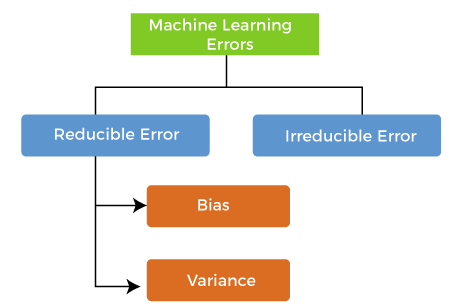

## 1. Bias and Variance

In [46]:
import plotly.express as px
import seaborn as sns
import numpy as np; import random; import pandas as pd; import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
warnings.simplefilter(action='ignore', category=FutureWarning)

In Machine Learning flow, what we do is,<br>
> Use Sample Data ----------> To predict the Population Parameters or say Output. 
<p> But here, acting like a God because no body knows the population data but us, assuming a population data of 1000 points with its <b> True Function, f</b> </p>

$$ Y = f(X) = X^2 $$

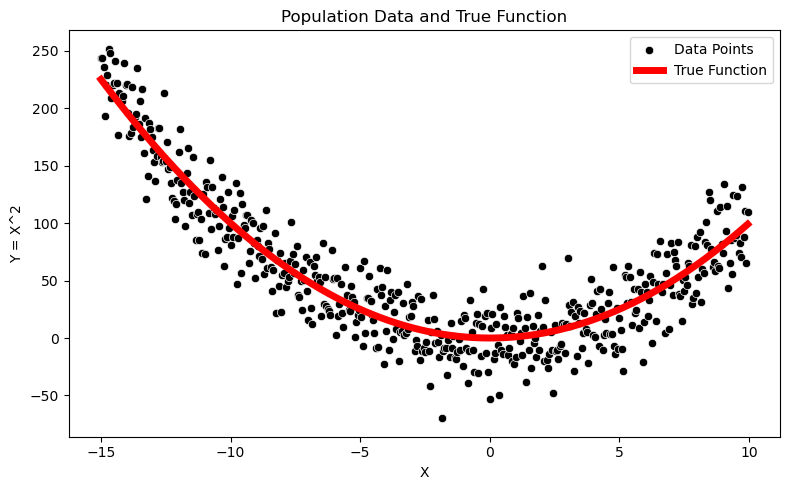

In [2]:
# Assuming a population data as per the True Function
inputs = np.arange(-15, 10, 0.05)
outs = np.power(inputs, 2)
noise = 20 * np.random.normal(size=inputs.size) + 10 * np.random.normal(size=inputs.size) # adding noise in the output
outs = outs + noise
plt.figure(figsize=(8, 5))
sns.scatterplot(x=inputs, y=outs, color='black', label='Data Points')
sns.lineplot(x=inputs, y=np.power(inputs, 2), color='red', linewidth=5, label = 'True Function'); plt.xlabel('X'); 
plt.ylabel('Y = X^2'); plt.title('Population Data and True Function'); plt.tight_layout()
plt.show()

Sampling the population data into three different samples,


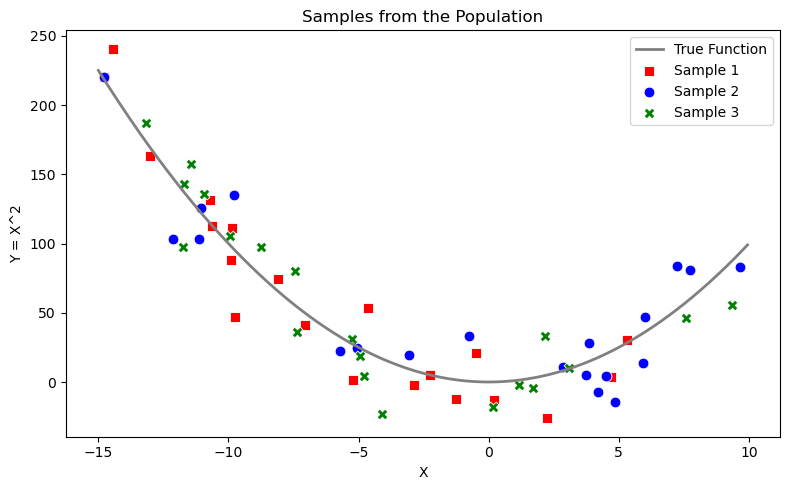

In [14]:
# sampling the population data into 3 samples
datas = pd.DataFrame([inputs, outs]).T
sample1 = datas.sample(20)
sample2 = datas.sample(20)
sample3 = datas.sample(20)
plt.figure(figsize=(8, 5))
sns.lineplot(x=inputs, y=np.power(inputs, 2), color='grey', linewidth=2, label = 'True Function');
sns.scatterplot(sample1, x=0, y=1, color='red', label='Sample 1', marker='s', s=60)
sns.scatterplot(sample2, x=0, y=1, color='blue', label='Sample 2', marker='o', s=60)
sns.scatterplot(sample3, x=0, y=1, color='green', label='Sample 3', marker='X', s=60); plt.xlabel('X'); plt.ylabel('Y = X^2');
plt.title('Samples from the Population'); plt.tight_layout(); plt.show()

Let say, we are unknown to true function of the sample. We do not know what is the population data and population parameters. <br> We just get the three samples, and we have to create a model on these samples respectively. <br> So, we prepare three different linear regression model for the three different samples.

In [8]:
# Fitting Linear Regression to the samples
lr1, lr2, lr3 = LinearRegression(), LinearRegression(), LinearRegression()
lr1.fit(sample1[[0]], sample1[[1]]); lr2.fit(sample2[[0]], sample2[[1]]); lr3.fit(sample3[[0]], sample3[[1]])

LinearRegression()

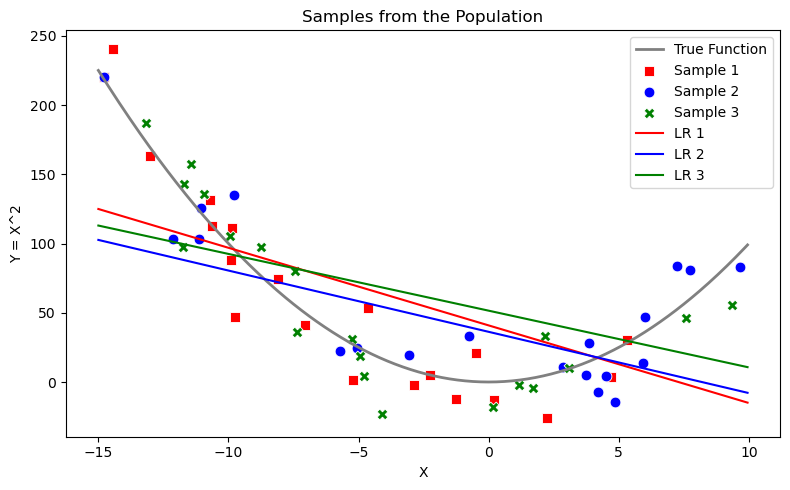

In [15]:
# plotting the predictions for the three samples and reviewing against the true function
plt.figure(figsize=(8, 5))
sns.lineplot(x=inputs, y=np.power(inputs, 2), color='grey', linewidth=2, label = 'True Function');
sns.scatterplot(sample1, x=0, y=1, color='red', label='Sample 1', marker='s', s=60)
sns.scatterplot(sample2, x=0, y=1, color='blue', label='Sample 2', marker='o', s=60)
sns.scatterplot(sample3, x=0, y=1, color='green', label='Sample 3', marker='X', s=60); plt.xlabel('X'); plt.ylabel('Y = X^2');
plt.plot(inputs, lr1.predict(inputs.reshape(-1, 1)), color='red', label='LR 1')
plt.plot(inputs, lr2.predict(inputs.reshape(-1, 1)), color='blue', label='LR 2')
plt.plot(inputs, lr3.predict(inputs.reshape(-1, 1)), color='green', label='LR 3')
plt.title('Samples from the Population'); plt.tight_layout(); plt.legend(); plt.show()

Here we can see that the models LR1, LR2 and LR3 are no-where near to the True Function from Population Data except at (around X=-10 and X=5) <br>
Now, LR1, LR2 and LR3, all of them are **High Bias** models as they are unable to capture the true relationship between the data points.<br> These models are the clear case of __Underfitting__. At the same time, they are **Low Variance** models.

 <h3><b><font color=#D92491> Bias </font></b></h3>
    
> In very simple terms, Bias = Errors on training data.

 <br>It can be defined as an inability of machine learning algorithms to capture the true relationship between the data points during Training. In other words, <font color=#3858c3>**Underfitting**.</font><p>
In general, a machine learning model analyses the data, find patterns in it and make predictions. <b> While training, the model learns these patterns in the dataset and applies them to test data for prediction. While making predictions, a difference occurs between prediction values made by the model and actual values/expected values, and this difference is known as bias errors or Errors due to bias. </b> </p><p>
Each algorithm begins with some amount of bias because bias occurs from assumptions in the model, which makes the target function simple to learn.</p> 
> * **Higher bias**, higher the error, and more is the inability of the model. <br>  A model with a high bias makes more assumptions, and the model becomes unable to capture the important features of our dataset. A high bias model also cannot perform well on new data.<br>
>* **Lower bias**, lower the error, and more is the ability of the model . A low bias model will make fewer assumptions about the form of the target function.

Generally, a linear algorithm has a high bias, as it makes them learn fast. The simpler the algorithm, the higher the bias it has likely to be introduced. Whereas a nonlinear algorithm often has low bias.

Some examples of machine learning algorithms with low bias are **Decision Trees, k-Nearest Neighbours and Support Vector Machines**. At the same time, an algorithm with high bias is **Linear Regression, Linear Discriminant Analysis and Logistic Regression**.
 <h4><b> Ways to Reduce Bias </b></h4>

> * Increase the input features as the model is underfitted. 
> * Decrease the regularization term. 
> * Use more complex models, such as including some polynomial features.

<h3><b><font color=#D92491> Variance </font></b></h3>
The variance specifies the amount of variation in the prediction if the different training data was used. In simple words, variance tells that how much a random variable is different from its expected value. Ideally, a model should not vary too much from one training dataset to another, which means the algorithm should be good in understanding the hidden mapping between inputs and output variables. Variance errors are either of low variance or high variance.<p>

> * **Low variance** means there is a small variation in the prediction of the target function with changes in the training data set. 
> * **High variance** shows a large variation in the prediction of the target function with changes in the training dataset.

A model that shows high variance learns a lot and perform well with the training dataset, and does not generalize well with the unseen dataset. As a result, such a model gives good results with the training dataset but shows high error rates on the test dataset. <br> A model with high variance has the below problems: <p> 
> * A high variance model leads to  <font color=#3858c3>**Overfitting**</font>.
> * Increase model complexities.

Usually, nonlinear algorithms have a lot of flexibility to fit the model, have high variance.

Some examples of machine learning algorithms with low variance are, **Linear Regression, Logistic Regression, and Linear discriminant analysis**. At the same time, algorithms with high variance are **decision tree, Support Vector Machine, and K-nearest neighbours**.
 <h4><b>  Ways to Reduce High Variance  </b></h4>

> * Reduce the input features or number of parameters as a model is overfitted.
> * Do not use a much complex model.
> * Increase the training data.
> * Increase the Regularization term.

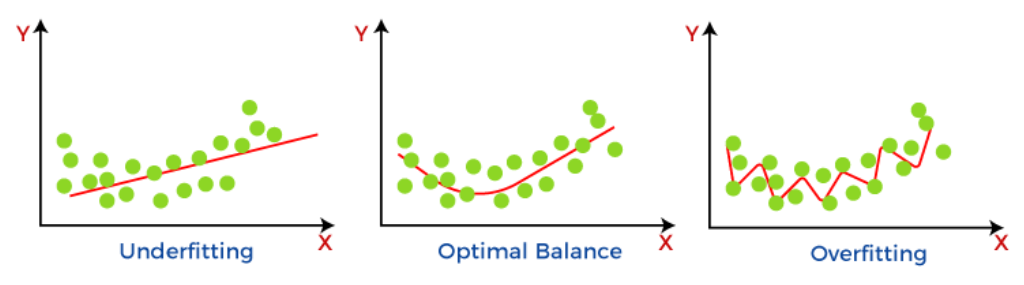

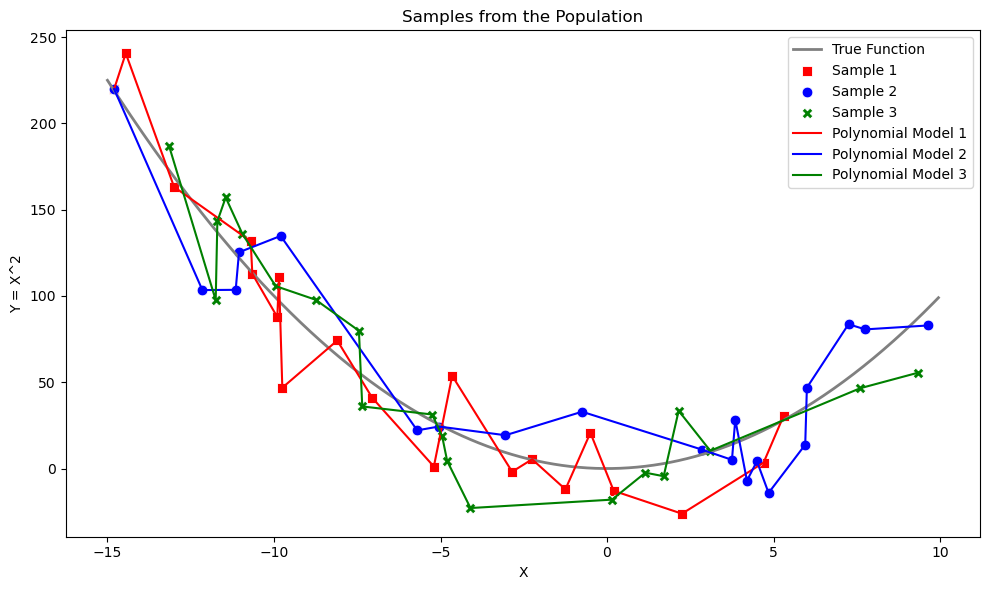

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=inputs, y=np.power(inputs, 2), color='grey', linewidth=2, label = 'True Function');
sns.scatterplot(sample1, x=0, y=1, color='red', label='Sample 1', marker='s', s=60)
sns.scatterplot(sample2, x=0, y=1, color='blue', label='Sample 2', marker='o', s=60)
sns.scatterplot(sample3, x=0, y=1, color='green', label='Sample 3', marker='X', s=60); 
sns.lineplot(sample1, x=0, y=1, color='red', label='Polynomial Model 1')
sns.lineplot(sample2, x=0, y=1, color='blue', label='Polynomial Model 2')
sns.lineplot(sample3, x=0, y=1, color='green', label='Polynomial Model 3')
plt.xlabel('X'); plt.ylabel('Y = X^2'); plt.title('Samples from the Population'); plt.tight_layout(); plt.legend();plt.show();


    
* Here, we can see, these ploynomial models fit the training data very closely and fit the true function perfectly.But variance is very large, since on average, prediction differs a lot, say, on -10 as input, we have different output values as per different Polynomial Models.<br>
This leads to __High Variance__, or say __Overfitting__, and at the same time, __Low Bias__ models.

For an accurate prediction of the model, algorithms need a **Low Variance & Low Bias**, means <br>
> * as of low bias, model is fitting good on training data and making good accuracy on it.
> * as of low variance, means we just replaced the training data with another unseen data, and still the result is consistent or say, good accuracy.

But the problem is, it is not possible to get a model with both Low Bias and Low variance because bias and variance are related to each other: <br> 
* If we decrease the variance, it will increase the bias.
* If we decrease the bias, it will increase the variance.

<p>

While building the machine learning model, it is really important to take care of bias and variance in order to avoid overfitting and underfitting in the model.<br> If the model is very simple with fewer parameters, it may have low variance and high bias. <br>Whereas, if the model has a large number of parameters, it will have high variance and low bias. <br>
So, it is required to make a balance between bias and variance errors, and this balance between the bias error and variance error is known as the <font color=#3858c3> **Bias-Variance trade-off** </font>.

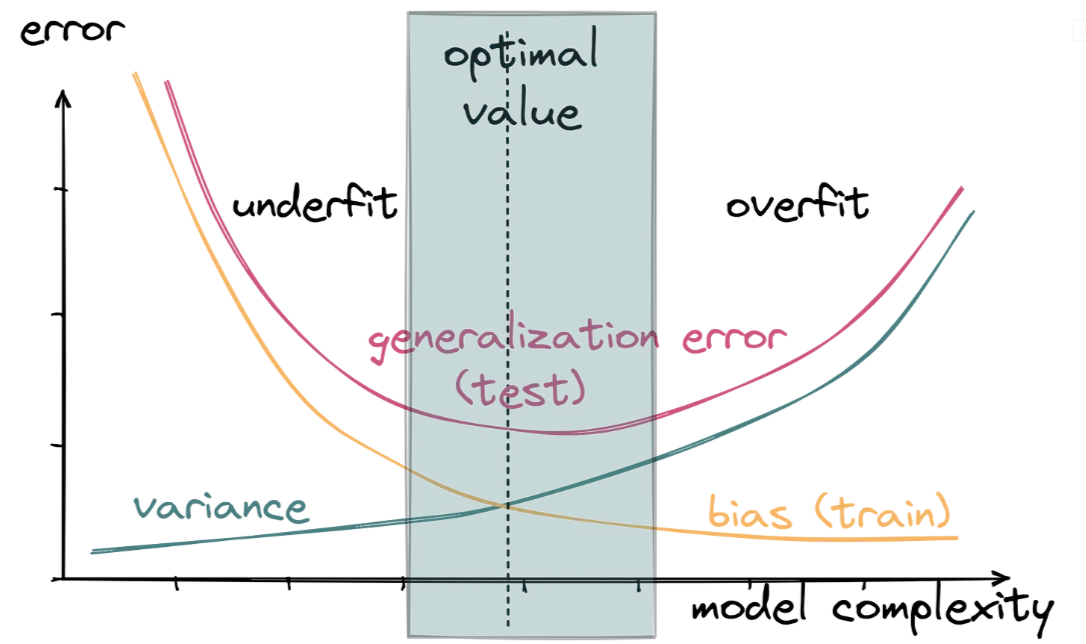

### *Bias-Variance trade-off is about finding the sweet spot to make a balance between bias and variance errors.*

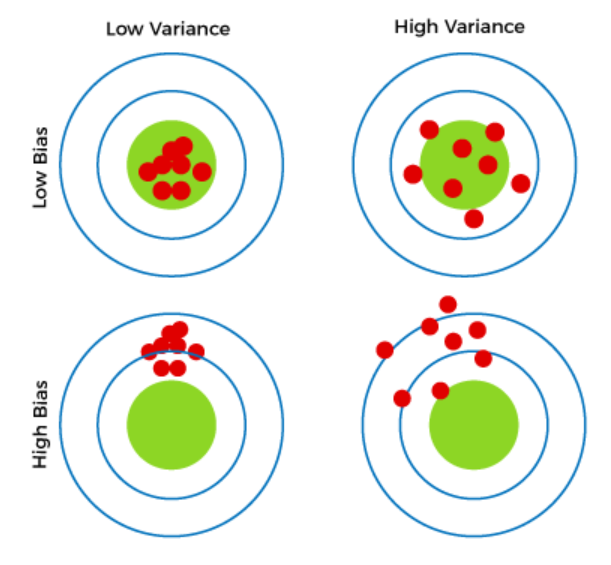

<h2> 1.1 Motivation behind Regularization?<br></h2> 

<font size=+1.5 color=purple><b> 1. Noise in predictors</b></font><font size=+1>

* Overfitting in mathematical terms means higher value of coefficients $\beta$.
* If there is noise in the training data, then the estimated coefficients train on them too making coefficients $\beta$ values higher than usual. In such cases, small changes to the elements of Inputs  lead to large changes in Output.
* Such models won’t generalize well to the future data. 
* This is where regularization comes in and shrinks or regularizes these learned coefficients.<p>
     
 <font size=+1.5 color=purple><b>
  **2. Too many predictors.** </font></b>
 <font size=+1>  
 * It is not unusual to see the number of input variables greatly exceed the number of observations, or say *High dimensional Datasets* e.g. microarray data analysis, environmental pollution studies.
 * With many predictors, fitting the full model without penalization will result in large prediction errors.

## 2. Ridge Regression (L2 Norm Regularization)

 Regularization is one of the most important concepts of machine learning. It is a technique to prevent the model from overfitting by adding extra information to it. <br>
Sometimes the machine learning model performs well with the training data but does not perform well with the test data. It means the model is not able to predict the output when deals with unseen data by introducing noise in the output, and hence the model is called overfitted. This problem can be deal with the help of a regularization technique.<br>
This technique can be used in such a way that it will allow to maintain all variables or features in the model by reducing the magnitude of the variables. Hence, it maintains accuracy as well as a generalization of the model.
* Ridge regression is one of the types of linear regression in which a small amount of bias is introduced so that we can get better long-term predictions.
* Ridge regression is a regularization technique, which is used to reduce the complexity of the model. It is also called as L2 regularization.
* In this technique, the cost function is altered by adding the penalty term to it. The amount of bias added to the model is called Ridge Regression penalty. We can calculate it by multiplying with the lambda to the squared weight of each individual feature.
* Ridge regression penalize the size of the regression coefficients based on their $L2 \text{ norm}$: In general form, Loss of ridge 
<font size = +1.5>

> $$ L_{ridge} = \sum_{i} (y_{ actual} - {y_{ predicted}})^2 + \lambda \sum_{k=1}^K \beta_k^2 $$

</font>

where $\beta$ are the coefficients of $K$ features. $i$ = $0$, $1$, $2$,... $n$ in $N$ samples in the dataset and $y$ is the target.

* The tuning parameter serves $\lambda$ to control the relative impact of these two terms on the regression coefficients estimates. <br> Selecting a good value of $\lambda$ is critical; cross - validation is used for this.

#### <b>OLS method for parameters estimation of  Ridge Regression</b>


$\mathbf{\text{The general equation for simple linear regression is}}$<br></font>


> $\hat{y_{i}} = \beta_{0} + \beta_{1} * x_{i} $  &emsp;&emsp;<b>--------- (1)</B>


where,
$\hat{y_{i}}$ = predicted values, $i$ = $1,2,3....... n$<br>

$\mathbf{\text{Ridge Loss function for Simple Linear Regression will be}}$

> $ L_{ridge} = \sum_{i} (y_{i} - (\beta_{0} + \beta_{1}  x_{i}))^2 + \lambda  \beta_1^2 $  &emsp;&emsp;<b>--------- (2)</B>

where, $\lambda$ is the hyper parameter, used for tuning.

OLS estimates the parameters e.g., $\beta_{0}$ and $\beta_{1} $ by finding that values for the $\beta_{0}$ (intercept) and $\beta_{1} $ (coefficient) that minimize the value of loss function $ L_{ridge}$,

The least estimators of $\beta_{0}$ and $\beta_{1} $, say $\hat{\beta_{0}}$ and $\hat{\beta_{1}} $ must satisfy, $\frac{\partial (L_{Ridge})}{\partial\beta_{0}}\Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}} = 0$ and $\frac{\partial (L_{Ridge})}{\partial\beta_{1}} \Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}}= 0$<br>


<font color = #9F3DBA>**(i) differentiating w.r.t $\beta_{0}$,** </font><br>

=> &emsp;$\frac{\partial (L_{Ridge})}{\partial\beta_{0}}\Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}} = \frac{\partial \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}}  x_{i} - \hat{\beta_{0}} )^2 + \lambda  \hat{\beta_{1}}^2 }{\partial \hat{\beta_{0}}} = 0$<br>

=> &emsp;$-2 * \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}} * x_{i} - \hat{\beta_{0}} )+ 0  = 0$<br>

=> &emsp;$\sum\limits _ {i = 0} ^ {n}(y_{i}) - \hat{\beta_{1}} * \sum\limits _ {i = 0} ^ {n}(x_{i}) - n * \hat{\beta_{0}} = 0$<br>

=> &emsp;$\frac{\sum\limits _ {i = 0} ^ {n}(y_{i}) - \hat{\beta_{1}} * \sum\limits _ {i = 0}^{n}(x_{i})}{n} = \hat{\beta_{0}}$<br>

=> &emsp;$\frac{\sum\limits _ {i = 0} ^ {n}(y_{i})}{n} - \frac{\hat{\beta_{1}} * \sum\limits _ {i = 0}^{n}(x_{i})}{n} = \hat{\beta_{0}}$<br>

 &emsp;<font size=4> <b>$\bar{y} -  \hat{\beta_{1}} * \bar{x} =  \hat{\beta_{0}}$ &emsp; &emsp;-------(3) </font></b><br><br>


<font color = #9F3DBA>**(ii) differentiating w.r.t $\beta_{1}$,** </font><br>

=> &emsp;$\frac{\partial (L_{Ridge})}{\partial\beta_{1}}\Bigg|_{\hat{\beta_{0}}  \hat{\beta_{1}}} = \frac{\partial \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}}  x_{i} - \hat{\beta_{0}} )^2 + \lambda  \hat{\beta_{1}}^2 }{\partial \hat{\beta_{1}}} = 0$<br>

Substituting the value of $\hat{\beta_{0}}$ from (3), <br>

=> $\frac{\partial \sum\limits _ {i = 0} ^ {n}(y_{i} - \hat{\beta_{1}}  x_{i} - \bar{y} +  \hat{\beta_{1}} * \bar{x} )^2 + \lambda  \hat{\beta_{1}}^2 }{\partial \hat{\beta_{1}}} = 0$<br>

=> &emsp;$-2 * \sum\limits _ {i = 0} ^ {n}(y_{i} - \bar{y}- \hat{\beta_{1}} (x_{i} - \bar{x}) ) * (x_{i} - \bar{x}) + 2 \lambda \hat{\beta_{1}} = 0$<br>

=> &emsp;$\lambda \hat{\beta_{1}} - \sum\limits _ {i = 0} ^ {n}((y_{i} - \bar{y}) - \hat{\beta_{1}} * (x_{i} - \bar{x}))* (x_{i} - \bar{x}) = 0$<br>

=> &emsp;$\lambda \hat{\beta_{1}} - \sum\limits _ {i = 0} ^ {n}(y_{i} - \bar{y})(x_{i} - \bar{x}) + \hat{\beta_{1}} * \sum\limits _ {i = 0} ^ {n} (x_{i} - \bar{x})^2= 0$<br>

=> &emsp;$ \hat{\beta_{1}} (\sum\limits _ {i = 0} ^ {n}(x_{i} - \bar{x})^2 + \lambda)= \sum\limits _ {i = 0} ^ {n}(y_{i} - \bar{y})(x_{i} - \bar{x}) $<br>

&emsp;<font size=4> 
$\hat{\beta_{1}} = \frac{\sum\limits _ {i = 0} ^ {n}(y_{i} - \bar{y})(x_{i} - \bar{x})}{\sum\limits _ {i = 0} ^ {n}(x_{i} - \bar{x})^2 + \lambda } $ &emsp;&emsp;<b>--------- (4)</B>

</font>
using (3) and (4), we will find that values of $\beta_{1} \textrm { and  } \beta_{0}$, that will minimize the loss $L_{Ridge}$ .
<br>

* Higher the value of $\lambda$ in eq (4), lower the value of $\hat{\beta_1}$.

* Overfitting means high value of coefficients (e.g., $\beta_1$).. and thus, Ridge regularization reduce the coefficients to a certain extent based on a value of $\lambda$ and prevents overfitting.

* The value of $\beta_1$ will change the value of $\beta_0$ as per eq (3) and this will change the value of intercept $\beta_0$. This is how the regularization works.

* Coefficients of Features only shrink near to 0 but not exactly 0 at any value $\lambda$ in Ridge Regularization.

* The correct value of $\lambda$ will increase the bias a little but reduce the variance considerably.  Thus Ridge regularisation prevents overfitting.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [72]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [73]:
X=data.data
y=data.target

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [75]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [76]:
L.fit(X_train,y_train)

LinearRegression()

In [77]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [78]:
y_pred=L.predict(X_test)

In [79]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539246
RMSE 48.727137609532534


In [80]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.05)

In [81]:
R.fit(X_train,y_train)

Ridge(alpha=0.05)

In [82]:
print(R.coef_)
print(R.intercept_)

[  28.95456041 -222.98439394  483.64780671  316.46770271 -152.69270105
  -59.61721782 -165.22067964  158.05507923  464.6434519   103.00779237]
152.0655598192803


In [83]:
y_pred1=R.predict(X_test)

In [84]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5227304929269154
RMSE 48.52829576603043


<font size=3> Scores are improved a little but they are improved.

### 2.1 How are coefficients affected in Ridge Regression?

In [86]:
coefs = []
r2_scores = []
for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)   
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

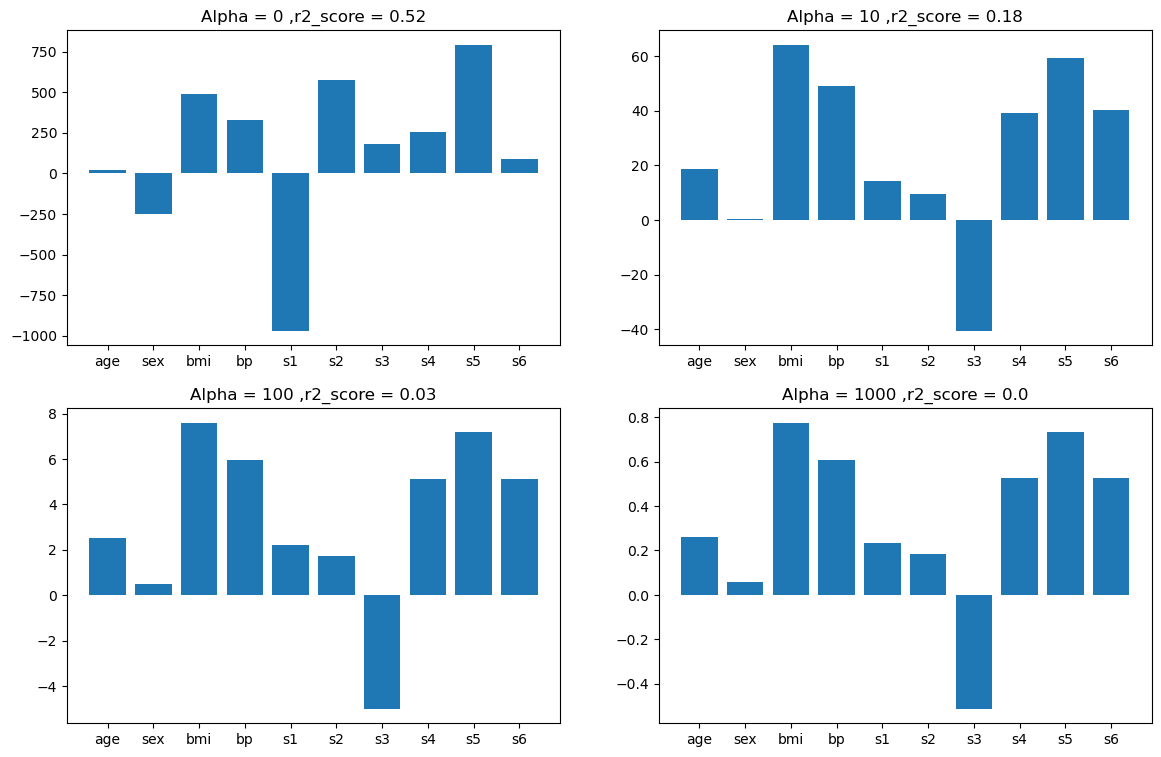

In [87]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

<font size=3>

* With increasing value of alpha or say $\lambda$, coefficients of features are decreasing as we can see from y-scale.
* coefficients only shrink near to 0 but not exactly 0 at any value $\lambda$ in Ridge Regularization. 

### 2.2 Higher Coefficients are affected more

In [89]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs = []
for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_.tolist())

In [90]:
input_array = np.array(coefs)

In [91]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,23.454654,-247.427474,492.108752,329.358764,-970.797230,573.542955,182.421624,255.921682,794.216093,89.322492
0.0001,23.517635,-247.317667,492.282449,329.331759,-957.463244,562.903103,176.710702,254.470333,789.108676,89.413758
0.0010,24.016144,-246.406044,493.592860,329.088330,-852.767736,479.424669,131.866827,243.032920,748.964644,90.155083
0.0100,26.261811,-240.399342,496.575080,326.659983,-420.981791,137.891804,-53.056922,194.223144,581.450282,94.313693
0.1000,31.033892,-204.830591,464.896345,304.964149,-95.760370,-87.529692,-183.818093,147.497940,425.853925,110.215599
1.0000,42.955098,-67.887067,280.270383,195.506087,0.015036,-30.813126,-145.767246,114.715808,243.273028,120.912940
10.0000,18.777884,0.364232,64.215213,49.175535,14.439729,9.623399,-40.539280,39.321539,59.201623,40.365253
100.0000,2.508376,0.499954,7.600231,5.950702,2.220424,1.729273,-5.003424,5.100126,7.167275,5.128502
1000.0000,0.259179,0.056343,0.774914,0.608267,0.232655,0.183516,-0.512558,0.525412,0.732780,0.527023


Coefficients with higher values like [s1, s5] converged much more near to 0 as compared to [age, s6]

In [92]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coefs = []
for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_.tolist())

In [93]:
input_array = np.array(coefs).T

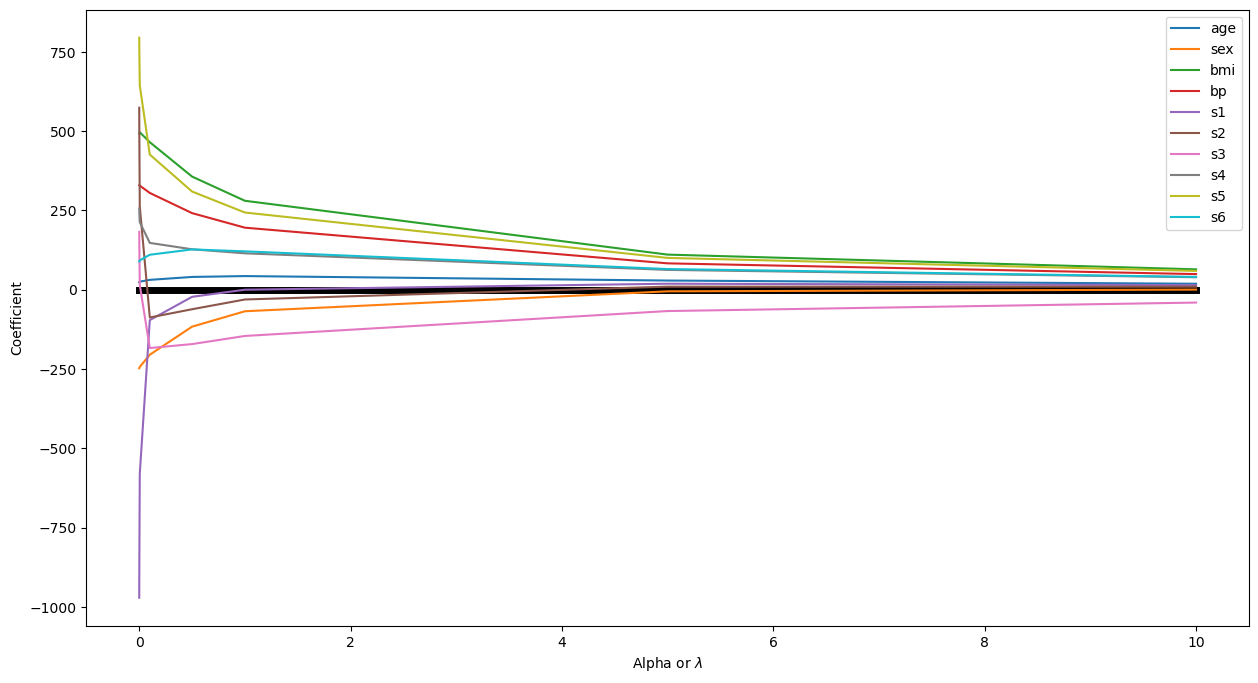

In [95]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.xlabel('Alpha or $\\lambda$')
plt.ylabel('Coefficient')
plt.legend()

<font size=3>

* The chart help us decide what value of $\lambda$ is suitable for our model..
* The correct value of $\lambda$ will increase the bias a little but reduce the variance considerably. Thus Ridge regularisation prevents overfitting. 

### 2.3 Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


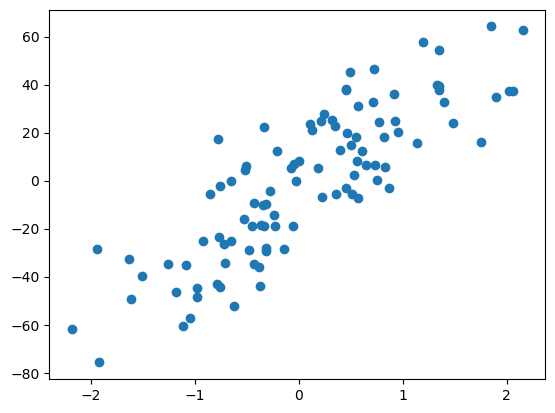

In [96]:
# considering a dataset with only one feature
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [97]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [98]:
def predict(m):
    return m*X - 2.29

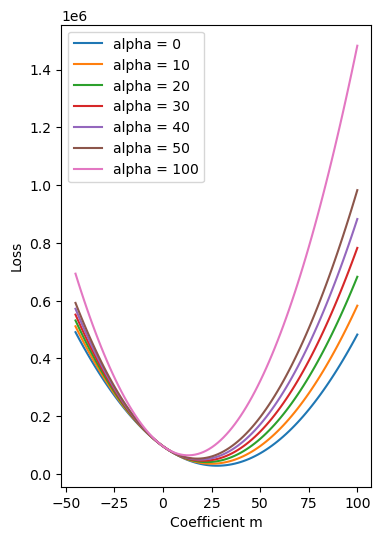

In [99]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Coefficient m')
plt.ylabel('Loss')
plt.show()

<font size=3> 

* Increase in $\lambda$ will shift the minima of Coefficient $\beta_1$ towards 0 and also shrinking the curve closer i.e., less spread.
* The is the reason, coefficients shrink near to 0 with increasing $\lambda$.
* Note that no coefficients get exactly 0 but only near to 0.

### for 2 coefficients
<img src='https://explained.ai/regularization/images/lagrange-animation.gif'>

## 3. Lasso regularisation (L1 Norm Regularization)


This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. <br>Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.<p>

In general form, Loss

<center><font size = "4">

> $ L_{Lasso} = \sum_{i} (y_{actual} - y_{predicted})^2 + \lambda \text{ }\sum_{k=1}^K| \beta | $</font></center>
where $\beta$ are the coefficients of $K$ features. $i$ = $0$, $1$, $2$,... $n$ in $N$ samples in the dataset, $\lambda$ is the tuning parameter and $y$ is the target.

<br>

 $\mathbf{\text{The general equation for simple linear regression is}}$<br></font>
<center>

> $\hat{y_{i}} = \beta_{0} + \beta_{1} * x_{i} $</font>&emsp;&emsp;&emsp;<b>------(1)</center></b>
where $\hat{y_{i}}$ is the predicted target.



In this shrinkage technique, the coefficients determined in the linear model from eq. (1) above are shrunk towards the central point as the mean by introducing a penalization factor called the alpha α (or sometimes $\lambda$) values.<br>

$\mathbf{\text{The Loss of Lasso regression for simple linear regresison is}}$
<center>

> $ L_{Lasso} = \sum_{i} (y_{i} - (\beta_{0} + \beta_{1}  x_{i}))^2 + \lambda \text{ }| \beta_1 | $ &emsp;&emsp;<b>------(2)</center></b>

A tuning parameter, λ controls the strength of the L1 penalty. λ is basically the amount of shrinkage:

* When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.
* As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).
* As λ increases, bias increases.
* As λ decreases, variance increases.


Alpha (α) or $\lambda$ can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is.

This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. On the other hand, L2 regularization (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models. This makes the Lasso far easier to interpret than the Ridge.

Due to the fact that coefficients will be shrunk towards a mean of zero, less important features in a dataset are eliminated when penalized. The shrinkage of these coefficients based on the alpha value provided leads to some form of automatic **feature selection**, as input variables are removed in an effective approach.

[27.49560527]
-1.2055275957840894


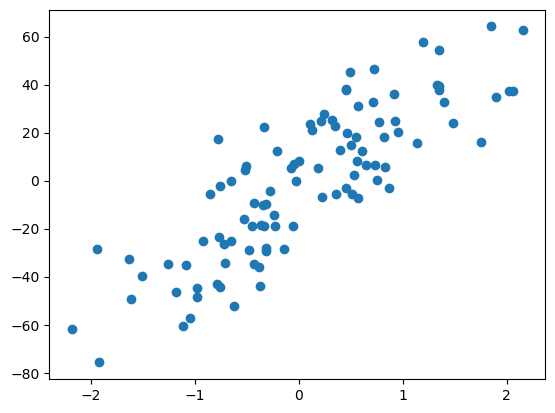

In [44]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression, Lasso

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e+04, tolerance: 7.409e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

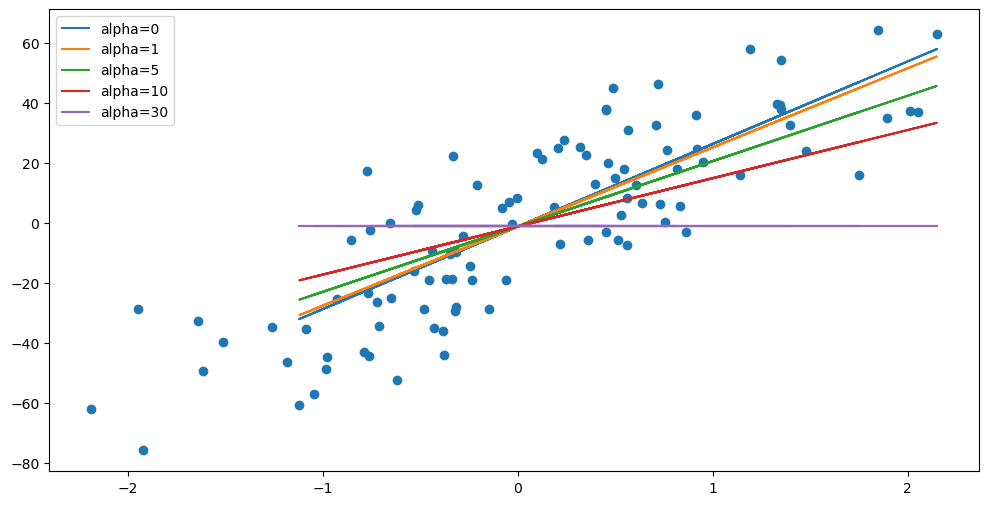

In [48]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()
    

### 3.1 How are coefficients affected in Lasso regression?

In [49]:
data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [50]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [51]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

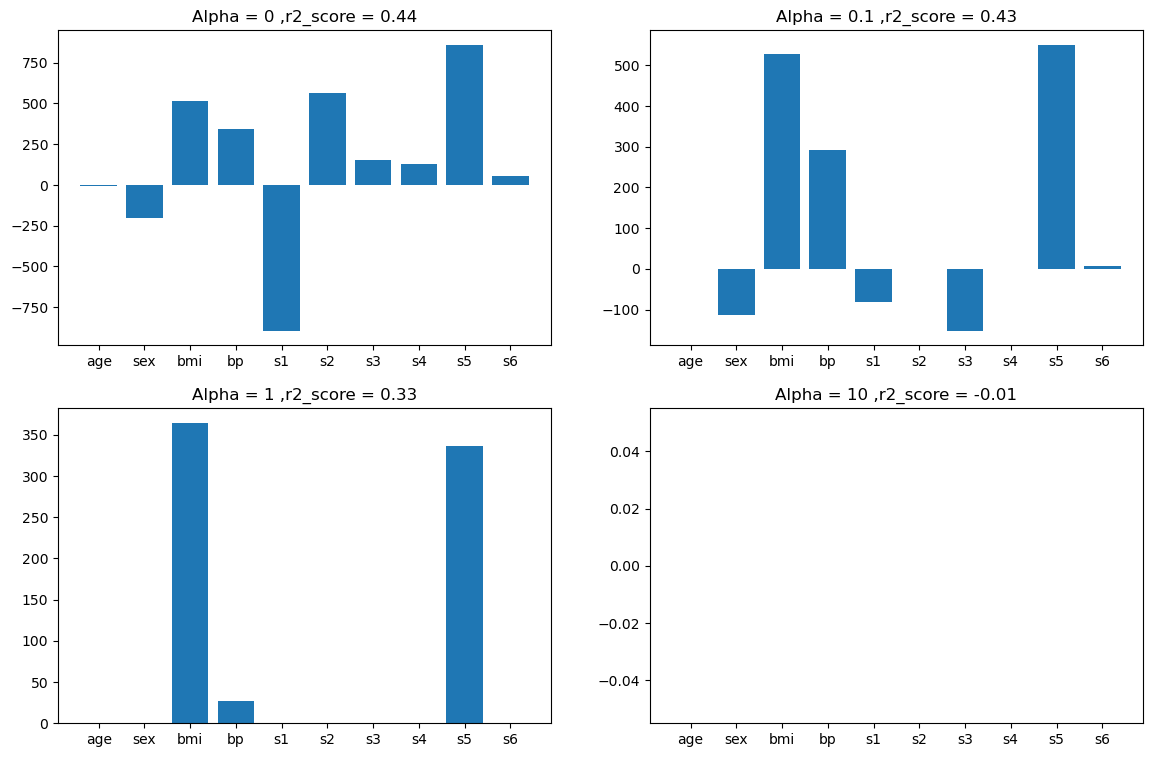

In [52]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

<font size=3>

* It is clearly visible that with increase in value of $\lambda$ will shrink the coefficients exactly to 0. 
* Also Lasso is helpful in getting know which feature has more importance, or in short., *feature selection*.

### 3.2 Higher Coefficients affected more

In [53]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

In [54]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [55]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

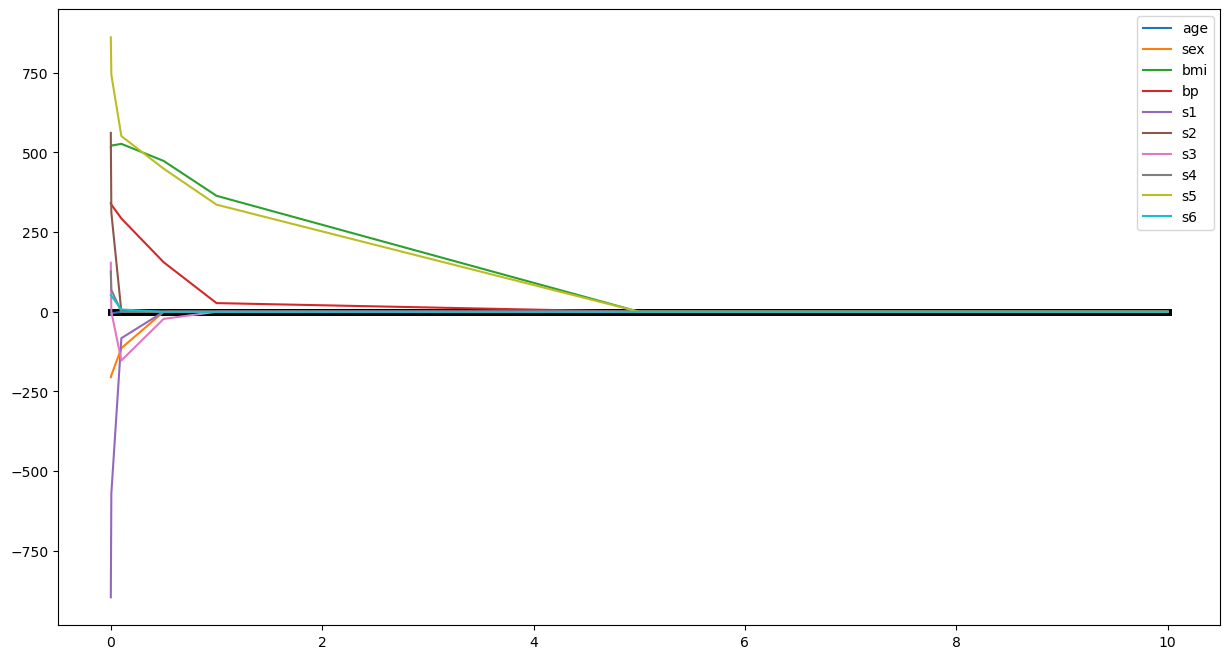

In [56]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

<font size=3>

* The chart help us decide what value of $\lambda$ is suitable for our model.. 
* The correct value of $\lambda$ will increase the bias a little but reduce the variance considerably. Which features have more importance at which value of $\lambda$ is clearly visible here.

### 3.3 Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


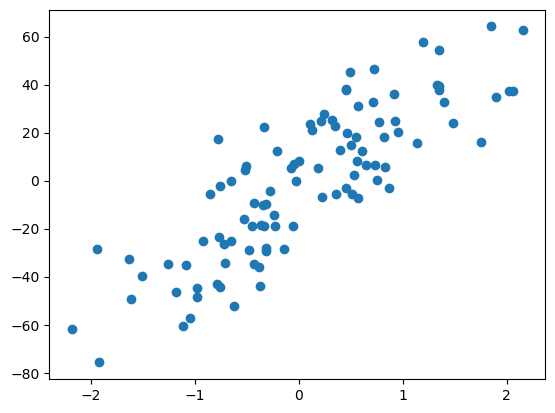

In [61]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [62]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [63]:
def predict(m):
    return m*X - 2.29

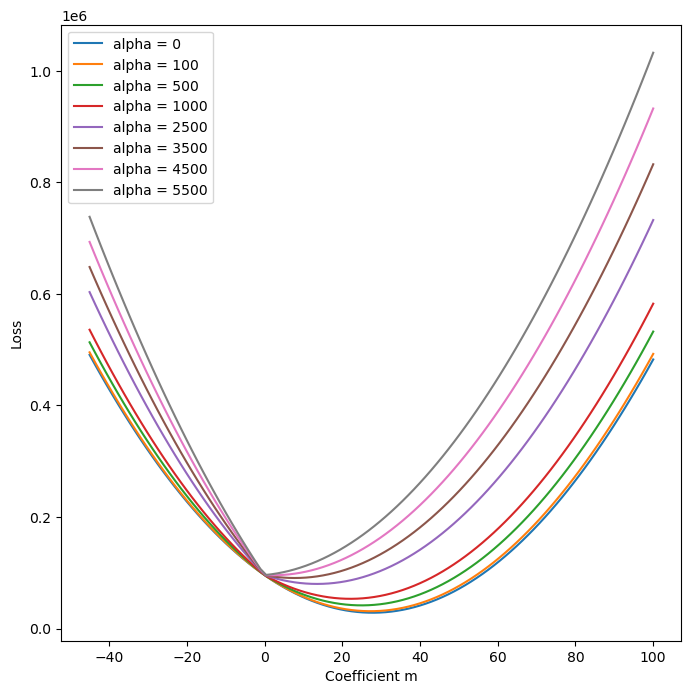

In [69]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(8,8))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Coefficient m')
plt.ylabel('Loss')
plt.show()

<font size=3> 

* Increase in $\lambda$ will shift the minima of Coefficient $\beta_1$ towards 0 and also shrinking the curve closer i.e., less spread.
* The is the reason, coefficients shrink near to 0 with increasing $\lambda$.
* Note that coefficients get exactly 0 with higher values of $\lambda$, we can clearly see the sharp turn at coefficient 0.

## 3. Difference between Ridge and Lasso
<table style = "width: 70%">  
    <tr> 
        <colgroup>
            <col span="1" style="width: 50%;">
            <col span="1" style="width: 50%;">
        </colgroup> 
        <th style="background-color: green"><b><center>Lasso Regression</th>  
        <th style="background-color: green">Ridge Regression</b></center></th>  
    </tr>  
    <tr>  
        <td>Lasso Regression uses L1 regularization (Absolute value of coefficients).</td>  
        <td>Ridge Regression uses L2 regularization (square of coefficients)</td>  
    </tr>  
    <tr>  
        <td>Lasso Regression can force them to be exactly zero.</td>  
        <td>Ridge Regression shrinks coefficients of less significant features towards zero.</td>  
    </tr>  
    <tr>  
        <td>Lasso Regression performs both regularization and feature selection, making it more suitable for high-dimensional datasets.</td>  
        <td>Ridge Regression does not perform feature selection and can only shrink the coefficient values. It doesn’t force any coefficients to exactly zero. This makes it more suitable for datasets with highly correlated predictors since it reduce their coefficients alongwith including all of them in the model.</td>  
    </tr>  
    <tr>  
        <td>
            Lasso Regression may be more effective in situations where only a subset of features contribute significantly to the output.</td>  
        <td>Ridge Regression generally works better in scenarios where there are fewer significant features.</td>  
    </tr>  
    <tr>  
        <td>Lasso Regression can lead to a sparse model, which means it can create a model with fewer features.</td>  
        <td>Ridge Regression does not produce sparse models.</td>  
    </tr> 
    
     
</table>  
